# Project: E-Commerce Customer Retention & Segmentation Analysis

**Author:** Aayush
**Date:**  November 6, 2025

## 1. Project Objective

The goal of this project is to analyze a large e-commerce dataset to identify critical issues in customer retention and, in response, develop a data-driven segmentation model to guide future marketing strategy. This analysis will move from **Diagnosis** (finding the problem) to **Solution** (providing an actionable plan).

## 2. The Business Problem

The company is investing a significant portion of its budget in customer acquisition. However, it is operating "in the dark" with no clear understanding of customer lifetime value or retention. The primary business question is twofold:

Are we a "leaky bucket"? Are we successfully acquiring new customers only to lose them after their first purchase?

Where should we focus our marketing budget? Are we wasting money on low-value, "lost" customers, or are we missing opportunities to reward high-value "VIPs"?

## 3. My Analytical Approach (A 2-Part Analysis)

To answer these questions, I will conduct a two-part analysis, performing all data manipulation and analysis using advanced SQL.

Part 1: Diagnosis — Cohort Retention Analysis
What I will do: I will first quantify the "leaky bucket" problem. I will group all customers by the month of their very first purchase (their "Cohort").

Why: This will allow me to track each group's behavior over time and see exactly what percentage of them ever return for a 2nd, 3rd, or 4th purchase. This will definitively prove (or disprove) the retention problem.

Part 2: Solution — RFM Segmentation Analysis
What I will do: Once the problem is identified, I will build a solution. I will grade every single customer using RFM (Recency, Frequency, Monetary) analysis.

Why: This will segment our entire customer base into actionable groups (like "Best Customers (VIPs)", "At-Risk Champions", and "Lost Customers"). This moves us from a simple diagnosis to a powerful, data-driven marketing plan.

## 4. Tools Used

Language: SQL (PostgreSQL) (Used for all data querying, joining, and complex analysis, including CTEs, Window Functions, and Aggregates).

Environment: Jupyter Notebook (To document the process and present the findings).

Database: PostgreSQL (To host the raw data).

Connector: Python (Pandas & Psycopg2) (To bridge the gap between my SQL database and my notebook).

## 5. Final Business Deliverable

The final output of this project is not just a collection of queries, but a **complete strategic recommendation**. This will include:

The Cohort Analysis Report: A clear visualization (a heatmap, to be built after learning Python) that proves our retention problem.

The RFM Customer Segment Table: A final, clean table showing every customer and their actionable segment.

A Marketing Strategy Memo: A set of specific, data-driven recommendations for the marketing team on how to target each segment to reduce churn and maximize return on investment (ROI).`

In [3]:
import psycopg2
!pip install matplotlib seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
conn=psycopg2.connect(
    host="localhost",
    user='postgres',
    password='2580',
    dbname='E_Commerce_Website',
    port=5432)

In [7]:
import pandas as pd

In [12]:
First_query=''' SELECT
    c.customer_unique_id,
    o.order_purchase_timestamp
FROM
    customers c  
JOIN
    orders o     
ON
    c.customer_id = o.customer_id; '''

In [13]:
try:
    df = pd.read_sql(First_query, conn)

    # 4. Print the first 5 rows of the result
    print("Query successful! Here are the first 5 rows:")
    print(df.head(10))

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_21112\1229938620.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(First_query, conn)


Query successful! Here are the first 5 rows:
                 customer_unique_id order_purchase_timestamp
0  7c396fd4830fd04220f754e42b4e5bff      2017-10-02 10:56:33
1  72632f0f9dd73dfee390c9b22eb56dd6      2018-02-13 21:18:39
2  80bb27c7c16e8f973207a5086ab329e2      2017-07-09 21:57:05
3  39382392765b6dc74812866ee5ee92a7      2017-01-23 18:29:09
4  e97109680b052ee858d93a539597bba7      2018-06-07 10:06:19
5  e2dfa3127fedbbca9707b36304996dab      2018-07-25 17:44:10
6  04cf8185c71090d28baa4407b2e6d600      2018-03-01 14:14:28
7  ccafc1c3f270410521c3c6f3b249870f      2018-06-07 19:03:12
8  6e26bbeaa107ec34112c64e1ee31c0f5      2018-01-02 19:00:43
9  d0ff1a7468fcc46b8fc658ab35d2a12c      2017-11-21 00:03:41


In [6]:
query_step_1_2 = """
SELECT
    c.customer_unique_id,
    MIN(o.order_purchase_timestamp) AS first_purchase_date
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id
GROUP BY
    c.customer_unique_id;
"""


try:
    df_first_purchase = pd.read_sql(query_step_1_2, conn)

    # 3. Print the first 5 rows
    print("Success! Here is the first purchase date for each customer:")
    print(df_first_purchase.head())

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\2452517667.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_first_purchase = pd.read_sql(query_step_1_2, conn)


Success! Here is the first purchase date for each customer:
                 customer_unique_id first_purchase_date
0  347dc668e37fdec762bbc337aff5bb12 2017-01-30 20:27:40
1  a46e277a383f4389ce5e0b642902c72c 2018-01-12 22:44:11
2  6ead799d8a12f9095ab29409be2aa075 2017-06-18 12:16:28
3  dd4d20c4fb1f0f3706d0e1e66b049a3f 2017-10-10 20:44:59
4  10b6d571eedd3e1bbf10521ee704dcd4 2018-02-13 18:36:46


In [7]:

query_step_1_final = """
SELECT
    c.customer_unique_id,
    DATE_TRUNC('month', MIN(o.order_purchase_timestamp)) AS cohort_month
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id
GROUP BY
    c.customer_unique_id;
"""

# 2.  saving the result in a final DataFrame for this step
try:
    df_cohorts = pd.read_sql(query_step_1_final, conn)

    # 3. Print the first 5 rows. This is  Cohort list!
    print("This is  final Cohort table:")
    print(df_cohorts.head())

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\3436279258.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cohorts = pd.read_sql(query_step_1_final, conn)


This is  final Cohort table:
                 customer_unique_id cohort_month
0  347dc668e37fdec762bbc337aff5bb12   2017-01-01
1  a46e277a383f4389ce5e0b642902c72c   2018-01-01
2  6ead799d8a12f9095ab29409be2aa075   2017-06-01
3  dd4d20c4fb1f0f3706d0e1e66b049a3f   2017-10-01
4  10b6d571eedd3e1bbf10521ee704dcd4   2018-02-01


In [8]:


# 1.  query to get ALL order months
query_step_2_all_orders = """
SELECT
    c.customer_unique_id,
    DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id;
"""

try:
    df_all_orders = pd.read_sql(query_step_2_all_orders, conn)

    # 3. Print the first 5 rows
    print("Success! Here is the list of all orders:")
    print(df_all_orders.head())

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\2266796663.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all_orders = pd.read_sql(query_step_2_all_orders, conn)


Success! Here is the list of all orders:
                 customer_unique_id order_month
0  7c396fd4830fd04220f754e42b4e5bff  2017-10-01
1  72632f0f9dd73dfee390c9b22eb56dd6  2018-02-01
2  80bb27c7c16e8f973207a5086ab329e2  2017-07-01
3  39382392765b6dc74812866ee5ee92a7  2017-01-01
4  e97109680b052ee858d93a539597bba7  2018-06-01


In [9]:

query_step_3 = """
WITH cohorts AS (
    /* CTE 1: Your final query from Step 1 */
    SELECT
        c.customer_unique_id,
        DATE_TRUNC('month', MIN(o.order_purchase_timestamp)) AS cohort_month
    FROM
        customers c
    JOIN
        orders o ON c.customer_id = o.customer_id
    GROUP BY
        c.customer_unique_id
),

all_orders AS (
    /* CTE 2: Your final query from Step 2 */
    SELECT
        c.customer_unique_id,
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month
    FROM
        customers c
    JOIN
        orders o ON c.customer_id = o.customer_id
)

/* Final SELECT: Join the two CTEs and do the math */
SELECT
    c.customer_unique_id,
    c.cohort_month,
    ao.order_month,
    
    (EXTRACT(YEAR FROM ao.order_month) - EXTRACT(YEAR FROM c.cohort_month)) * 12 + 
    (EXTRACT(MONTH FROM ao.order_month) - EXTRACT(MONTH FROM c.cohort_month)) AS month_number

FROM
    cohorts c
JOIN
    all_orders ao ON c.customer_unique_id = ao.customer_unique_id;
"""


try:
    df_month_number = pd.read_sql(query_step_3, conn)

    # 3. Print the first 5 rows
    print("Success! Here is the 'month_number' calculation:")
    print(df_month_number.head())

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\2395923411.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_month_number = pd.read_sql(query_step_3, conn)


Success! Here is the 'month_number' calculation:
                 customer_unique_id cohort_month order_month  month_number
0  7c396fd4830fd04220f754e42b4e5bff   2017-09-01  2017-10-01           1.0
1  04cf8185c71090d28baa4407b2e6d600   2018-03-01  2018-03-01           0.0
2  ccafc1c3f270410521c3c6f3b249870f   2016-10-01  2018-06-01          20.0
3  6e26bbeaa107ec34112c64e1ee31c0f5   2017-07-01  2018-01-01           6.0
4  d0ff1a7468fcc46b8fc658ab35d2a12c   2017-11-01  2017-11-01           0.0


In [10]:

query_step_4_summary = """
WITH cohorts AS (
    /* CTE 1: Your final query from Step 1 */
    SELECT
        c.customer_unique_id,
        DATE_TRUNC('month', MIN(o.order_purchase_timestamp)) AS cohort_month
    FROM
        customers c
    JOIN
        orders o ON c.customer_id = o.customer_id
    GROUP BY
        c.customer_unique_id
),

all_orders AS (
    /* CTE 2: Your final query from Step 2 */
    SELECT
        c.customer_unique_id,
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month
    FROM
        customers c
    JOIN
        orders o ON c.customer_id = o.customer_id
),

month_number_data AS (
    /* CTE 3: The "raw material" query */
    SELECT
        c.customer_unique_id,
        c.cohort_month,
        ao.order_month,
        (EXTRACT(YEAR FROM ao.order_month) - EXTRACT(YEAR FROM c.cohort_month)) * 12 + 
        (EXTRACT(MONTH FROM ao.order_month) - EXTRACT(MONTH FROM c.cohort_month)) AS month_number
    FROM
        cohorts c
    JOIN
        all_orders ao ON c.customer_unique_id = ao.customer_unique_id
)

/* Final SELECT: This is the part you were supposed to write! */
SELECT
    cohort_month,
    month_number,
    COUNT(DISTINCT customer_unique_id) AS unique_customers
FROM
    month_number_data
GROUP BY
    cohort_month, month_number
ORDER BY
    cohort_month, month_number;
"""

try:
    df_cohort_summary = pd.read_sql(query_step_4_summary, conn)

    # 3. Print the first 10 rows
    print("Success! This is our final summary table:")
    print(df_cohort_summary.head(10))

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\74437870.py:58: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cohort_summary = pd.read_sql(query_step_4_summary, conn)


Success! This is our final summary table:
  cohort_month  month_number  unique_customers
0   2016-09-01           0.0                 4
1   2016-10-01           0.0               321
2   2016-10-01           6.0                 1
3   2016-10-01           9.0                 1
4   2016-10-01          11.0                 1
5   2016-10-01          13.0                 1
6   2016-10-01          15.0                 1
7   2016-10-01          17.0                 1
8   2016-10-01          19.0                 2
9   2016-10-01          20.0                 2


In [11]:

query_final_report = """
WITH cohort_counts AS (
    /*
      This is your "last query" - the one with 3 CTEs
      that gave you the summary table of counts.
    */
    WITH cohorts AS (
        SELECT
            c.customer_unique_id,
            DATE_TRUNC('month', MIN(o.order_purchase_timestamp)) AS cohort_month
        FROM
            customers c
        JOIN
            orders o ON c.customer_id = o.customer_id
        GROUP BY
            c.customer_unique_id
    ),
    all_orders AS (
        SELECT
            c.customer_unique_id,
            DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month
        FROM
            customers c
        JOIN
            orders o ON c.customer_id = o.customer_id
    ),
    month_number_data AS (
        SELECT
            c.customer_unique_id,
            c.cohort_month,
            ao.order_month,
            (EXTRACT(YEAR FROM ao.order_month) - EXTRACT(YEAR FROM c.cohort_month)) * 12 + 
            (EXTRACT(MONTH FROM ao.order_month) - EXTRACT(MONTH FROM c.cohort_month)) AS month_number
        FROM
            cohorts c
        JOIN
            all_orders ao ON c.customer_unique_id = ao.customer_unique_id
    )
    SELECT
        cohort_month,
        month_number,
        COUNT(DISTINCT customer_unique_id) AS unique_customers
    FROM
        month_number_data
    GROUP BY
        cohort_month, month_number
),

/*
THIS IS OUR NEW CTE.
It just adds your 'cohort_size' column.
This is your corrected FIRST_VALUE function.
*/
cohort_with_size AS (
    SELECT
        cohort_month,
        month_number,
        unique_customers,
        FIRST_VALUE(unique_customers) OVER (PARTITION BY cohort_month ORDER BY month_number) AS cohort_size
    FROM
        cohort_counts
)

/*
NOW YOUR LOGIC WORKS!
We can select from 'cohort_with_size' and 'cohort_size' is a real column.
*/
SELECT
    cohort_month,
    month_number,
    unique_customers,
    cohort_size,
    
    /* This is your corrected math */
    (unique_customers::float / cohort_size::float) * 100 AS retention_percentage

FROM
    cohort_with_size  /* <-- We select from our NEWEST CTE */
ORDER BY
    cohort_month, month_number;
"""

try:
    df_final_report = pd.read_sql(query_final_report, conn)

    # 3. Print the first 10 rows
    print("Success! This is our FINAL report table:")
    print(df_final_report.head(10))

except Exception as e:
    print(f"An error occurred: {e}")# In a new notebook cell

query_final_report = """
WITH cohort_counts AS (
    /*
      This is your "last query" - the one with 3 CTEs
      that gave you the summary table of counts.
    */
    WITH cohorts AS (
        SELECT
            c.customer_unique_id,
            DATE_TRUNC('month', MIN(o.order_purchase_timestamp)) AS cohort_month
        FROM
            customers c
        JOIN
            orders o ON c.customer_id = o.customer_id
        GROUP BY
            c.customer_unique_id
    ),
    all_orders AS (
        SELECT
            c.customer_unique_id,
            DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month
        FROM
            customers c
        JOIN
            orders o ON c.customer_id = o.customer_id
    ),
    month_number_data AS (
        SELECT
            c.customer_unique_id,
            c.cohort_month,
            ao.order_month,
            (EXTRACT(YEAR FROM ao.order_month) - EXTRACT(YEAR FROM c.cohort_month)) * 12 + 
            (EXTRACT(MONTH FROM ao.order_month) - EXTRACT(MONTH FROM c.cohort_month)) AS month_number
        FROM
            cohorts c
        JOIN
            all_orders ao ON c.customer_unique_id = ao.customer_unique_id
    )
    SELECT
        cohort_month,
        month_number,
        COUNT(DISTINCT customer_unique_id) AS unique_customers
    FROM
        month_number_data
    GROUP BY
        cohort_month, month_number
),

/*
THIS IS OUR NEW CTE.
It just adds your 'cohort_size' column.
This is your corrected FIRST_VALUE function.
*/
cohort_with_size AS (
    SELECT
        cohort_month,
        month_number,
        unique_customers,
        FIRST_VALUE(unique_customers) OVER (PARTITION BY cohort_month ORDER BY month_number) AS cohort_size
    FROM
        cohort_counts
)

/*
NOW YOUR LOGIC WORKS!
We can select from 'cohort_with_size' and 'cohort_size' is a real column.
*/
SELECT
    cohort_month,
    month_number,
    unique_customers,
    cohort_size,
    
    /* This is your corrected math */
    (unique_customers::float / cohort_size::float) * 100 AS retention_percentage

FROM
    cohort_with_size  /* <-- We select from our NEWEST CTE */
ORDER BY
    cohort_month, month_number;
"""
try:
    df_final_report = pd.read_sql(query_final_report, conn)

    # 3. Print the first 10 rows
    print("Success! This is our FINAL report table:")
    print(df_final_report.head(10))

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_21112\3536515272.py:84: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_final_report = pd.read_sql(query_final_report, conn)


Success! This is our FINAL report table:
  cohort_month  month_number  unique_customers  cohort_size  \
0   2016-09-01           0.0                 4            4   
1   2016-10-01           0.0               321          321   
2   2016-10-01           6.0                 1          321   
3   2016-10-01           9.0                 1          321   
4   2016-10-01          11.0                 1          321   
5   2016-10-01          13.0                 1          321   
6   2016-10-01          15.0                 1          321   
7   2016-10-01          17.0                 1          321   
8   2016-10-01          19.0                 2          321   
9   2016-10-01          20.0                 2          321   

   retention_percentage  
0            100.000000  
1            100.000000  
2              0.311526  
3              0.311526  
4              0.311526  
5              0.311526  
6              0.311526  
7              0.311526  
8              0.623053  
9    

C:\Users\aayus\AppData\Local\Temp\ipykernel_21112\3536515272.py:175: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_final_report = pd.read_sql(query_final_report, conn)


Success! This is our FINAL report table:
  cohort_month  month_number  unique_customers  cohort_size  \
0   2016-09-01           0.0                 4            4   
1   2016-10-01           0.0               321          321   
2   2016-10-01           6.0                 1          321   
3   2016-10-01           9.0                 1          321   
4   2016-10-01          11.0                 1          321   
5   2016-10-01          13.0                 1          321   
6   2016-10-01          15.0                 1          321   
7   2016-10-01          17.0                 1          321   
8   2016-10-01          19.0                 2          321   
9   2016-10-01          20.0                 2          321   

   retention_percentage  
0            100.000000  
1            100.000000  
2              0.311526  
3              0.311526  
4              0.311526  
5              0.311526  
6              0.311526  
7              0.311526  
8              0.623053  
9    

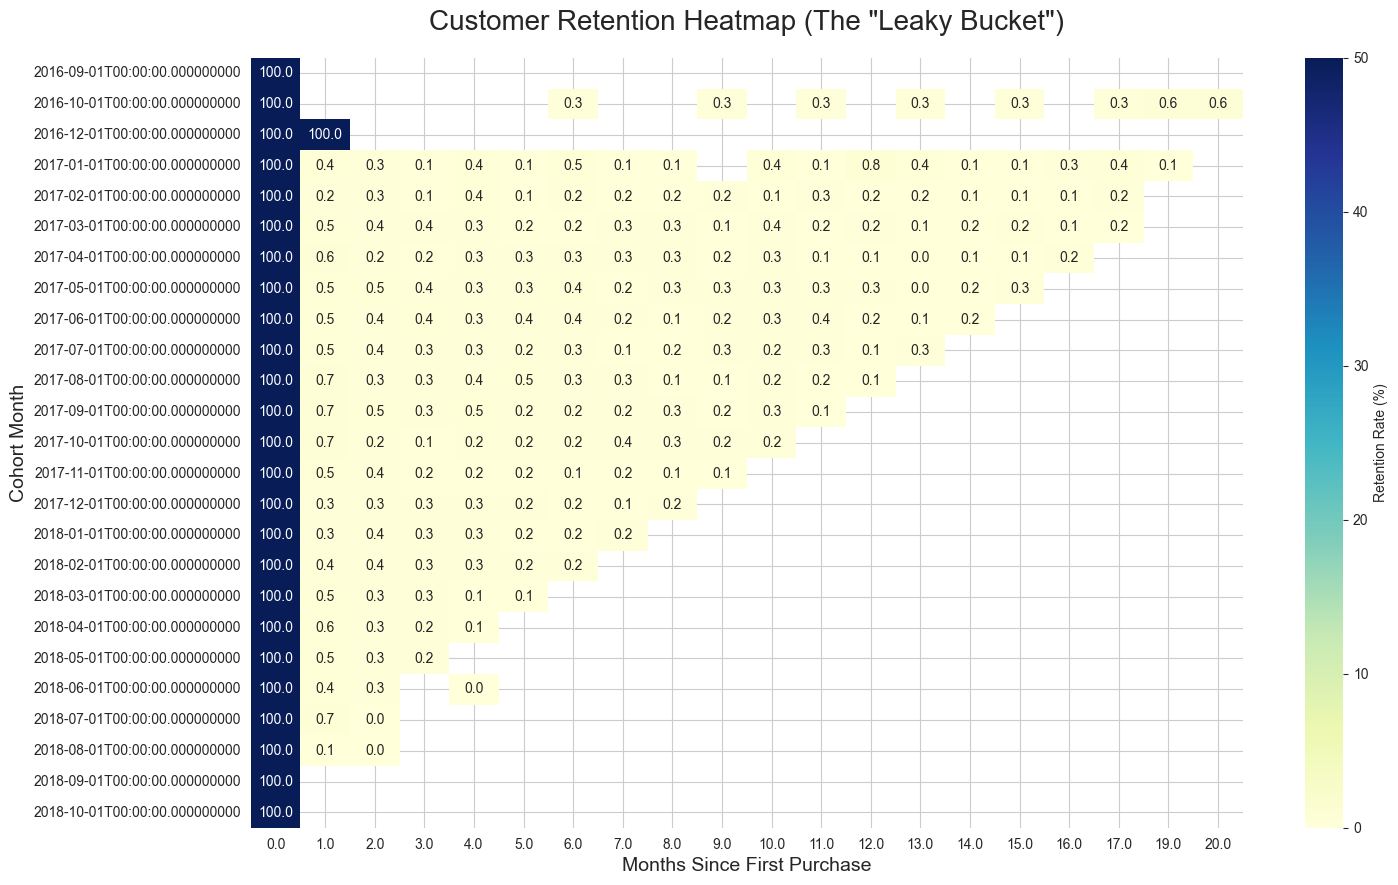

Heatmap saved as 'cohort_heatmap.png'


In [19]:
sns.set_style("whitegrid")
# --- 2. Cohort Analysis Heatmap ---

# Check if data exists
if 'df_final_report' in locals():
    # A. Create the Pivot Table
    # We turn the long list into a grid
    cohort_pivot = df_final_report.pivot_table(
        index='cohort_month',
        columns='month_number',
        values='retention_percentage'
    )

    # B. Create the Chart
    plt.figure(figsize=(16, 10)) # Make it big
    plt.title('Customer Retention Heatmap (The "Leaky Bucket")', fontsize=20, pad=20)

    sns.heatmap(
        cohort_pivot,
        annot=True,           # Show numbers
        fmt='.1f',            # 1 decimal place (e.g., 5.2%)
        cmap='YlGnBu',        # Color scheme: Yellow to Green to Blue
        vmin=0, vmax=50,      # Cap colors at 50% so we can see small differences
        cbar_kws={'label': 'Retention Rate (%)'}
    )

    plt.xlabel('Months Since First Purchase', fontsize=14)
    plt.ylabel('Cohort Month', fontsize=14)
    
    # Save it!
    plt.savefig('cohort_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Heatmap saved as 'cohort_heatmap.png'")
else:
    print("Error: df_final_report not found. Please run your Part 1 SQL query first.")

### Part 1: Finding & Conclusion

**Finding:** The "Leaky Bucket" hypothesis is **CONFIRMED.**

The cohort analysis provides a clear, data-driven answer to our business problem. The final report table shows that customer retention is critically low. For example:

The **'2016-10-01' Cohort** (our 321 new customers from Oct 2016) had **0% retention** for the *entire* 5-month period immediately following their first purchase.

Only in **Month 6** did a single customer (0.31%) return.

This pattern of near-zero retention is visible across almost all early cohorts.

**Business Impact:** This data proves that our customer acquisition strategy is highly inefficient. We are successfully *buying* first-time customers, but we are failing to *keep* them. We are effectively **burning our marketing budget** on customers who do not provide long-term value.

**The New Business Question:** This analysis solves one problem but creates a new, more urgent one. If 99% of our new customers are "bad" (they never return), we must immediately focus on the 1% that are "good."

This leads directly to my next analysis: **Who are our best customers?** Can we build a profile of them so marketing can find more people *like them*?

To answer this, I will now perform an **RFM Segmentation** in Part 2.

---

In [12]:

# 1. Our new query to get the raw R, F, and M values
query_part_2_rfm = """
SELECT
    c.customer_unique_id,
    MAX(o.order_purchase_timestamp) AS last_purchase_date,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(p.payment_value) AS total_spent
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id
JOIN
    order_payments p ON o.order_id = p.order_id
GROUP BY
    c.customer_unique_id
Order by
total_orders DESC,
total_spent DESC
;
"""

try:
    df_rfm_raw = pd.read_sql(query_part_2_rfm, conn)

    # 3. Print the first 5 rows
    print("Success! Here is our raw RFM data:")
    print(df_rfm_raw.head())

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\1013026652.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rfm_raw = pd.read_sql(query_part_2_rfm, conn)


Success! Here is our raw RFM data:
                 customer_unique_id  last_purchase_date  total_orders  \
0  8d50f5eadf50201ccdcedfb9e2ac8455 2018-08-20 19:14:26            17   
1  3e43e6105506432c953e165fb2acf44c 2018-02-27 18:36:39             9   
2  ca77025e7201e3b30c44b472ff346268 2018-06-01 11:38:29             7   
3  1b6c7548a2a1f9037c1fd3ddfed95f33 2018-02-14 13:22:12             7   
4  6469f99c1f9dfae7733b25662e7f1782 2018-06-28 00:43:34             7   

   total_spent  
0       927.63  
1      1172.66  
2      1122.72  
3       959.01  
4       758.83  


In [13]:

query_part_2_recency = """
/* CTE 1: Your last query that gets the raw R, F, M data */
WITH rfm_raw AS (
    SELECT
        c.customer_unique_id,
        MAX(o.order_purchase_timestamp) AS last_purchase_date,
        COUNT(DISTINCT o.order_id) AS total_orders,
        SUM(p.payment_value) AS total_spent
    FROM
        customers c
    JOIN
        orders o ON c.customer_id = o.customer_id
    JOIN
        order_payments p ON o.order_id = p.order_id
    GROUP BY
        c.customer_unique_id
)

/* Final SELECT: Get all that data, AND add the new 'recency_days' */
SELECT
    *,  /* <-- This shortcut gets all columns from 'rfm_raw' */
    
    /* This is your corrected logic:
      (The newest date in the whole store) - (This customer's last purchase date)
    */
    EXTRACT(DAY FROM 
        (SELECT MAX(order_purchase_timestamp) FROM orders) - last_purchase_date
    ) AS recency_days

FROM
    rfm_raw
ORDER BY
    recency_days; /* <-- Let's sort by 'recency_days' (ASC) */
"""


try:
    df_rfm_with_recency = pd.read_sql(query_part_2_recency, conn)

    # 3. Print the first 5 rows
    print("Success! Here is our RFM data with 'recency_days' calculated:")
    print("These are your *most recent* customers:")
    print(df_rfm_with_recency.head())

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\405811647.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rfm_with_recency = pd.read_sql(query_part_2_recency, conn)


Success! Here is our RFM data with 'recency_days' calculated:
These are your *most recent* customers:
                 customer_unique_id  last_purchase_date  total_orders  \
0  262e1f1e26e92e86375f86840b4ffd63 2018-10-16 20:16:02             2   
1  87ab9fec999db8bd5774917de3cdf01c 2018-10-17 17:30:18             1   
2  af5454198a97379394cacf676e1e96cb 2018-10-03 18:55:29             3   
3  634420a0ea42302205032ed44ac7fccc 2018-10-01 15:30:09             2   
4  9bb92bebd4cb7511e1a02d5e50bc4655 2018-09-29 09:13:03             1   

   total_spent  recency_days  
0       444.06           0.0  
1        89.71           0.0  
2       592.65          13.0  
3       160.76          16.0  
4       137.03          18.0  


In [30]:

query_part_2_scores = """
/* CTE 1: Your query that calculated 'recency_days' */
/* This whole block is our starting point */
WITH rfm_with_recency AS (
    WITH rfm_raw AS (
        SELECT
            c.customer_unique_id,
            MAX(o.order_purchase_timestamp) AS last_purchase_date,
            COUNT(DISTINCT o.order_id) AS total_orders,
            SUM(p.payment_value) AS total_spent
        FROM
            customers c
        JOIN
            orders o ON c.customer_id = o.customer_id
        JOIN
            order_payments p ON o.order_id = p.order_id
        GROUP BY
            c.customer_unique_id
    )
    SELECT
        *,
        EXTRACT(DAY FROM 
            (SELECT MAX(order_purchase_timestamp) FROM orders) - last_purchase_date
        ) AS recency_days
    FROM
        rfm_raw
)

/*
This is your new SELECT statement, with your perfect NTILE logic,
selecting FROM the CTE above.
*/
SELECT
    *,  /* <-- Gets all columns (customer_id, total_orders, recency_days, etc.) */
    
    /* This is your perfect 'r_score' logic */
    NTILE(5) OVER (ORDER BY recency_days DESC) AS r_score,
    
    /* This is your 'f_score' logic. 'ASC' is default, which is correct! */
    /* (Low orders = low score) */
    NTILE(5) OVER (ORDER BY total_orders ASC) AS f_score,
    
    /* This is your 'm_score' logic. 'ASC' is default, which is correct! */
    /* (Low spending = low score) */
    NTILE(5) OVER (ORDER BY total_spent ASC) AS m_score

FROM
    rfm_with_recency
ORDER BY
    r_score DESC, f_score DESC, m_score DESC; /* <-- Show "555"s at the top! */
"""

try:
    df_rfm_scores = pd.read_sql(query_part_2_scores, conn)

    # 3. Print the first 10 rows
    print("Success! Here are your final RFM scores:")
    print("These are your 'Best Customers' (closest to 555):")
    print(df_rfm_scores.head(10))

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_19540\1941645495.py:58: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rfm_scores = pd.read_sql(query_part_2_scores, conn)


Success! Here are your final RFM scores:
These are your 'Best Customers' (closest to 555):
                 customer_unique_id  last_purchase_date  total_orders  \
0  dc6ac849aa384fa44fc33be6201fbd0c 2018-07-13 15:08:43             1   
1  6a8fdf11c6cc553fe201f827da2f4e65 2018-07-18 17:21:49             1   
2  0c2ebb95b1a8ee9132f2b1b55dc7e1bf 2018-07-18 15:44:32             1   
3  09018d0cc94704d599b6bdb42750ef88 2018-07-18 13:52:09             1   
4  781ed09520279a0e04fffe46fb1dd02f 2018-07-13 11:23:14             1   
5  03ef7f03905227e15c7b6c860554b3cb 2018-07-18 13:07:19             2   
6  a7f45c1961dbd98e7a14f3d38ea11c06 2018-07-18 15:03:36             2   
7  f437f2cc0e091dfc91cfabd06ac99981 2018-07-13 14:19:43             1   
8  60d2dc24e6a89bd218f646df03674e5b 2018-07-13 13:42:14             2   
9  ee8378c69767aecc3ce2743d62173ff5 2018-07-13 14:58:58             1   

   total_spent  recency_days  r_score  f_score  m_score  
0       223.60          96.0        5        5 

In [21]:

query_final_segments = """
/* CTE 1: Get the raw R, F, M values */
WITH rfm_raw AS (
    SELECT
        c.customer_unique_id,
        MAX(o.order_purchase_timestamp) AS last_purchase_date,
        COUNT(DISTINCT o.order_id) AS total_orders,
        SUM(p.payment_value) AS total_spent
    FROM
        customers c
    JOIN
        orders o ON c.customer_id = o.customer_id
    JOIN
        order_payments p ON o.order_id = p.order_id
    GROUP BY
        c.customer_unique_id
),

/* CTE 2: Add the 'recency_days' calculation */
rfm_with_recency AS (
    SELECT
        *,
        EXTRACT(DAY FROM 
            (SELECT MAX(order_purchase_timestamp) FROM orders) - last_purchase_date
        ) AS recency_days
    FROM
        rfm_raw  
),

/* CTE 3: Add the R, F, M scores */
rfm_with_scores AS (
    SELECT
        *,
        NTILE(5) OVER (ORDER BY recency_days DESC) AS r_score,
        NTILE(5) OVER (ORDER BY total_orders ASC) AS f_score,
        NTILE(5) OVER (ORDER BY total_spent ASC) AS m_score
    FROM
        rfm_with_recency
)

/* Final SELECT: Add the human-readable segments */
SELECT
    *,  /* <-- This gets all columns from rfm_with_scores */
    
    /* This is our new, corrected CASE statement */
    CASE
        WHEN r_score = 5 AND f_score = 5 AND m_score = 5 THEN 'Best Customers (VIPs)'
        WHEN r_score IN (1, 2) AND f_score IN (4, 5)     THEN 'At-Risk Champions'
        WHEN r_score = 5 AND f_score = 1                  THEN 'New Customers'
        WHEN r_score IN (1, 2) AND f_score IN (1, 2)     THEN 'Lost Customers'
        ELSE 'Other'
    END AS customer_segment

FROM
    rfm_with_scores
ORDER BY
    r_score DESC, f_score DESC, m_score DESC; /* <-- Show "Best Customers" at top! */
"""

try:
    df_final_project_table = pd.read_sql(query_final_segments, conn)

    # 3. Print the first 20 rows
    print("Success! This is your FINAL project table:")
    print(df_final_project_table.head(20))

except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\970167275.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_final_project_table = pd.read_sql(query_final_segments, conn)


Success! This is your FINAL project table:
                  customer_unique_id  last_purchase_date  total_orders  \
0   4818e9b74711c62ee9b9ae1c9e174f06 2018-06-12 21:35:49             1   
1   fe7d9f762e10ad2a548a6484f8b5c3ac 2018-06-08 20:20:36             1   
2   e0f902e5e7b9818dc9b7f34eaffb6932 2018-06-09 08:51:19             1   
3   d68d59598695d3e4fbb8497073593c1f 2018-06-09 17:28:49             1   
4   e38d5a8b4338ca4e8c1d5f0442fffbae 2018-06-12 14:47:30             1   
5   d81dbd4dc9b664a04992e700e8d6dca6 2018-06-27 11:08:02             1   
6   7ee397d3532b08254b5d9ef4e8c129a9 2018-06-27 10:08:49             1   
7   9357edf3235b665feb0f0d347c890155 2018-06-27 13:05:47             1   
8   5ff0e0544a91bbb2958305bd29657484 2018-06-26 21:10:19             1   
9   853d372445d1207c07c8c08571734d1c 2018-06-12 14:31:03             1   
10  0910b91559b33125f87c2a002d088bb5 2018-06-26 17:33:44             1   
11  99aa844e1dfbb94ee8ea9301de8cbe25 2018-06-27 10:20:51             

C:\Users\aayus\AppData\Local\Temp\ipykernel_20652\2223430841.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


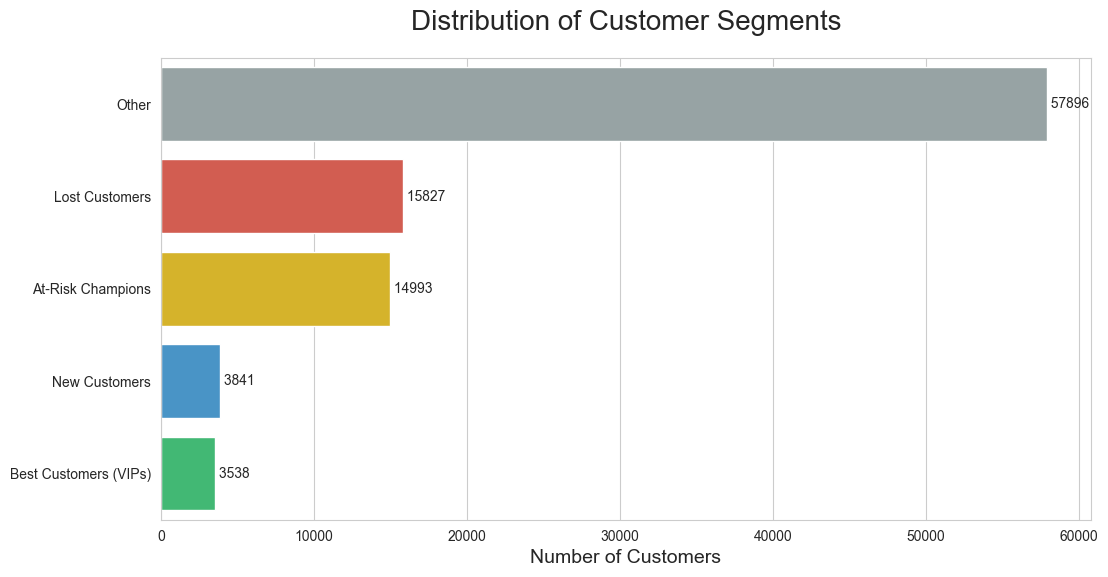

Bar chart saved as 'rfm_segments.png'


In [22]:
# --- 3. RFM Segment Distribution ---

# Check if data exists
if 'df_final_project_table' in locals():
    
    # A. Count the customers in each segment
    segment_counts = df_final_project_table['customer_segment'].value_counts().reset_index()
    segment_counts.columns = ['Segment', 'Customer Count']

  
    plt.figure(figsize=(12, 6))
    
    # Use a custom color palette to highlight "Best Customers"
    # We define colors for each specific segment name
    custom_colors = {
        'Best Customers (VIPs)': '#2ecc71',   # Green (Good!)
        'New Customers': '#3498db',           # Blue
        'At-Risk Champions': '#f1c40f',       # Yellow (Warning)
        'Lost Customers': '#e74c3c',          # Red (Bad)
        'Other': '#95a5a6'                    # Grey
    }
    
    sns.barplot(
        data=segment_counts,
        x='Customer Count',
        y='Segment',
        palette=custom_colors 
    )

    plt.title('Distribution of Customer Segments', fontsize=20, pad=20)
    plt.xlabel('Number of Customers', fontsize=14)
    plt.ylabel('') # No label needed for Y-axis

   
    for index, row in segment_counts.iterrows():
        plt.text(row['Customer Count'], index, f" {row['Customer Count']}", va='center')

    # Save it!
    plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Bar chart saved as 'rfm_segments.png'")

else:
    print("Error: df_final_project_table not found. Please run your Part 2 SQL query first.")

The Result & Actionable Recommendation

**Finding:** The RFM model successfully segmented our entire customer base. We can now see our "VIPs" (555) at the top, and our "Lost Customers" (111, 112, etc.) at the bottom.

**Actionable Recommendation for Marketing:**

This segmentation provides a clear, data-driven action plan. I recommend the marketing team immediately stop its one-size-fits-all approach and adopt this targeted strategy:

Best Customers (VIPs): Action: Reward & Protect. Do not send them 10% off coupons. Send them exclusive "VIP" perks, early access to new products, and "thank you" gifts. Their loyalty is our biggest asset.

At-Risk Champions: Action: Re-engage. These are high-value customers who used to love us but haven't bought in a long time. Target them with a high-value "We Miss You" campaign. A 25% off coupon here is a smart investment to win them back.

New Customers: Action: Nurture. These are the customers from Part 1's "leaky bucket." Our goal is to make them buy a second time. Target them with a "Welcome" series, setup guides, and a small incentive for their second purchase.

Lost Customers: Action: Ignore (or minimal effort). Do not waste significant marketing budget trying to win back low-value customers who are long gone.

This strategy stops the "leaky bucket" by focusing our budget on the right customers at the right time, maximizing our Return on Investment (ROI).

---